This step is to check if there exists obvious difference among cates with FFT

In [3]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [19]:
parent_directory='../../data/train'

In [20]:
sub_folders=glob.glob(os.path.join(parent_directory,'*'))

In [24]:
# pick up all first file in each sub folder

files=[]

for folder_path in sub_folders:
    first_file=glob.glob(os.path.join(folder_path,'*.ogg'))[0]
    files.append(first_file)

print(files)

['../../data/train/ashpri1/XC116338.ogg', '../../data/train/asikoe2/XC115086.ogg', '../../data/train/ashwoo2/XC125152.ogg', '../../data/train/ashdro1/XC114598.ogg', '../../data/train/asiope1/XC194954.ogg', '../../data/train/asbfly/XC134896.ogg']


In [28]:
def timeD_to_freD(file_path):
    """
    convert audio data from time domain to frequency domain
    """
    y, sr =librosa.load(file_path,sr=None)

    fft = np.fft.fft(y)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sr, len(magnitude))

    ## extract each cate name from path
    cate_name=file_path.split('/')[-2]


    # Step 3: Draw the audio waveform
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(y)
    plt.title(f'time domain--{cate_name}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    # Step 4: Plot the Spectrum
    half_len = len(magnitude) // 2 
    plt.subplot(2, 1, 2)
    plt.plot(frequency[:half_len], magnitude[:half_len])
    plt.title(f'frequency domain--{cate_name}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')

    plt.tight_layout()
    plt.show()

    plt.close()



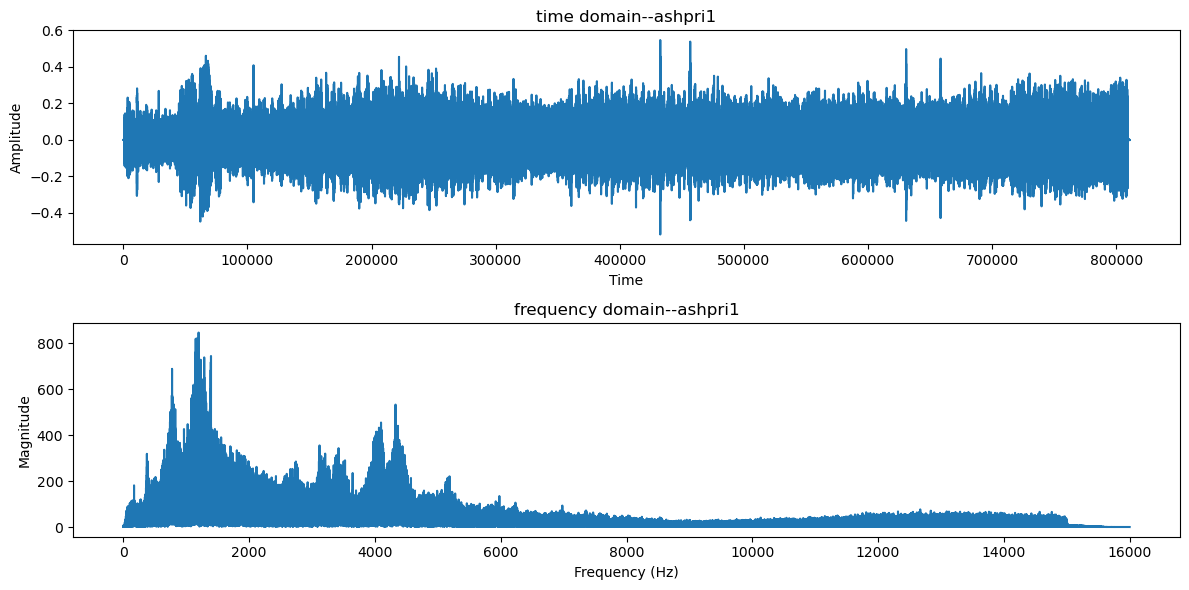

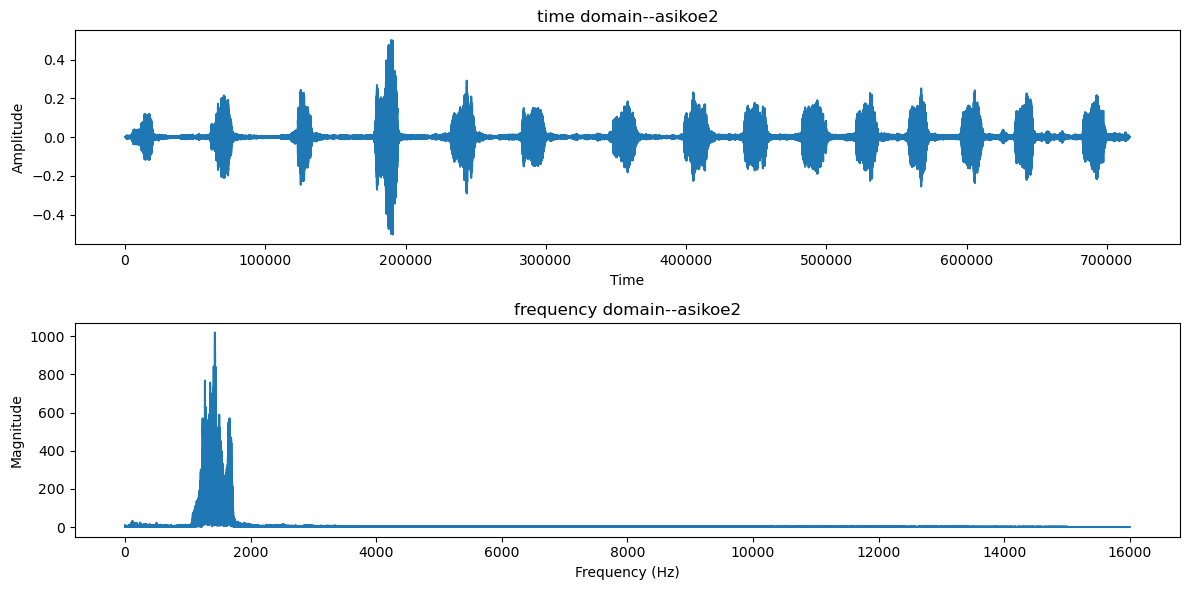

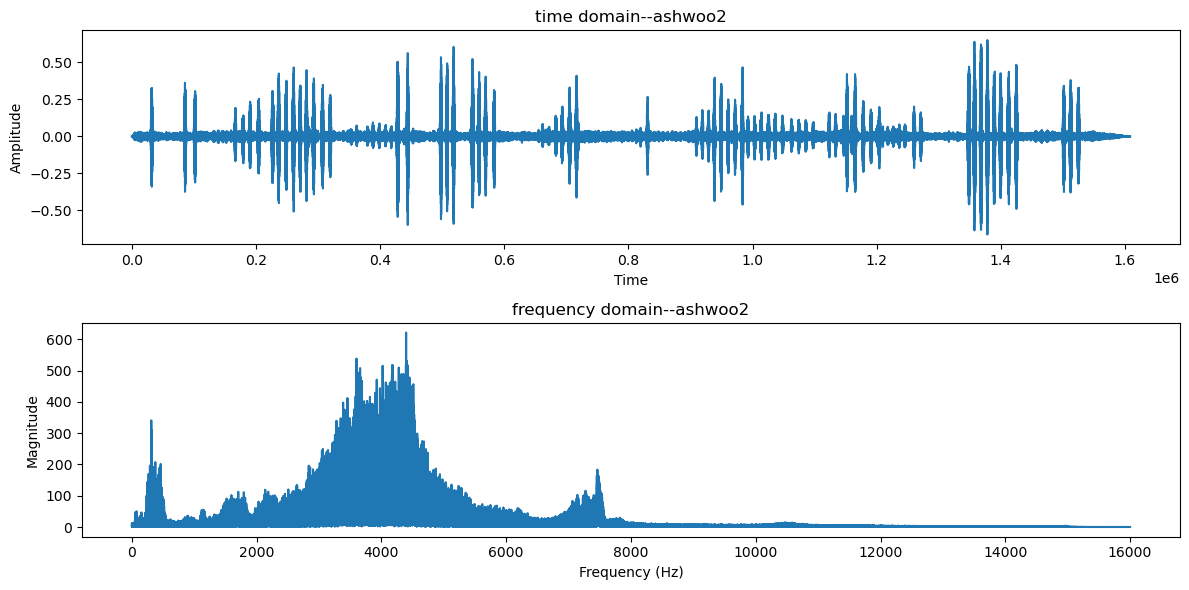

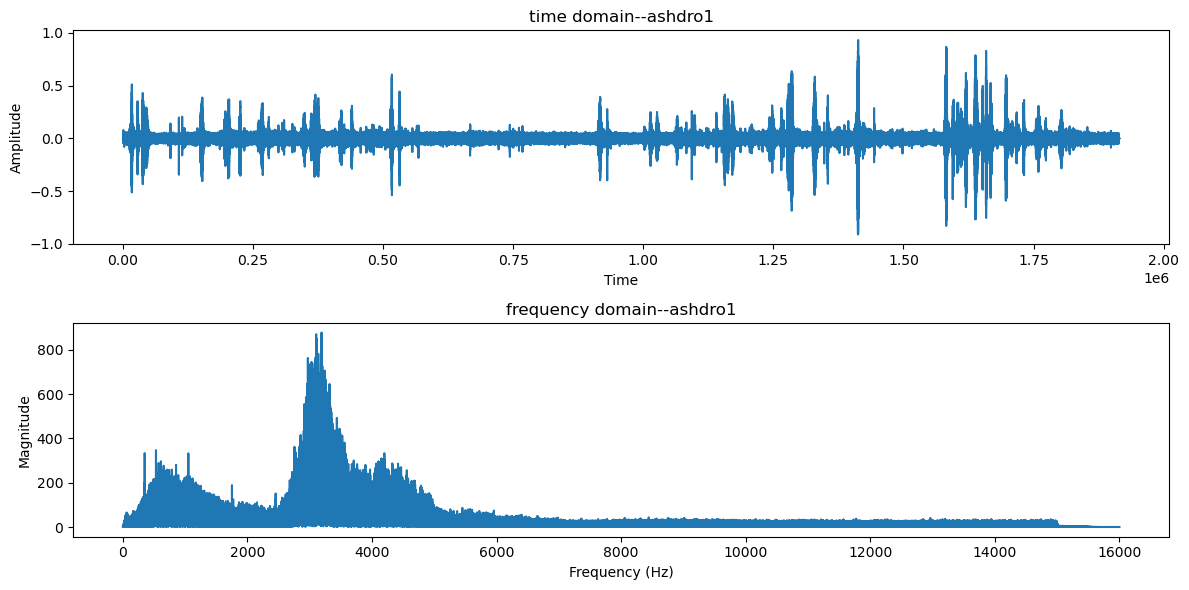

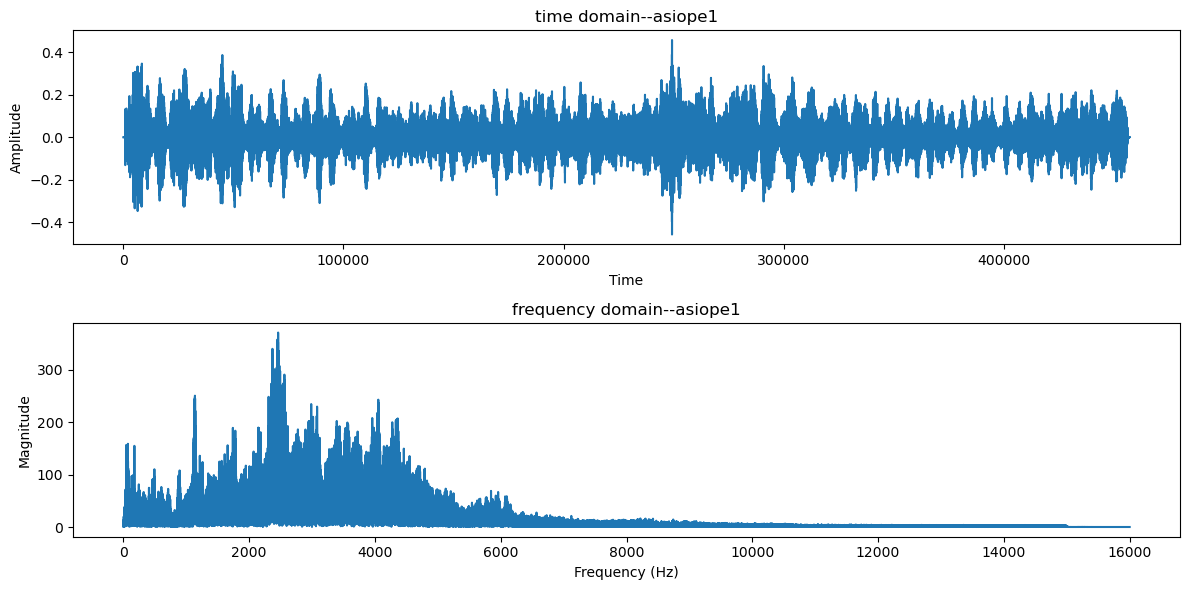

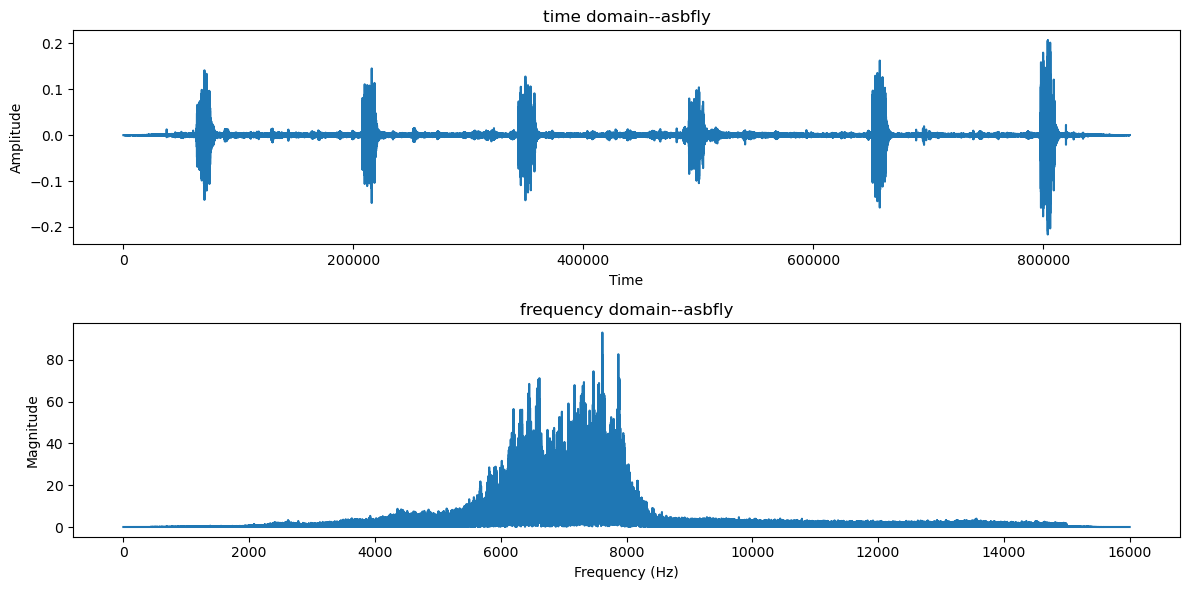

In [29]:
for audio_file in files:
    timeD_to_freD(audio_file)